In [360]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Loading data

In [512]:
raw_train_features = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_features = pd.read_csv('test_values.csv')

raw_train_features.transpose()

,0,1,2,3,4,5,6,7,8,9,...,260591,260592,260593,260594,260595,260596,260597,260598,260599,260600
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500,...,560805,207683,226421,159555,827012,688636,669485,602512,151409,747594
geo_level_1_id,6,8,21,22,11,8,9,20,0,26,...,20,10,8,27,8,25,17,17,26,21
geo_level_2_id,487,900,363,418,131,558,475,323,757,886,...,368,1382,767,181,268,1335,715,51,39,9
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994,...,5980,1903,8613,1537,4718,1621,2060,8163,1851,9101
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1,...,1,2,2,6,2,1,2,3,2,3
age,30,10,10,10,30,10,25,0,15,0,...,25,25,5,0,20,55,0,55,10,10
area_percentage,6,8,5,6,8,9,3,8,8,13,...,5,5,13,13,8,6,6,6,14,7
height_percentage,5,7,5,5,9,5,4,6,6,4,...,3,5,5,12,5,3,5,7,6,6
land_surface_condition,t,o,t,t,t,t,n,t,t,t,...,n,t,t,t,t,n,t,t,t,n
foundation_type,r,r,r,r,r,r,r,w,r,i,...,r,r,r,r,r,r,r,r,r,r


### EDA

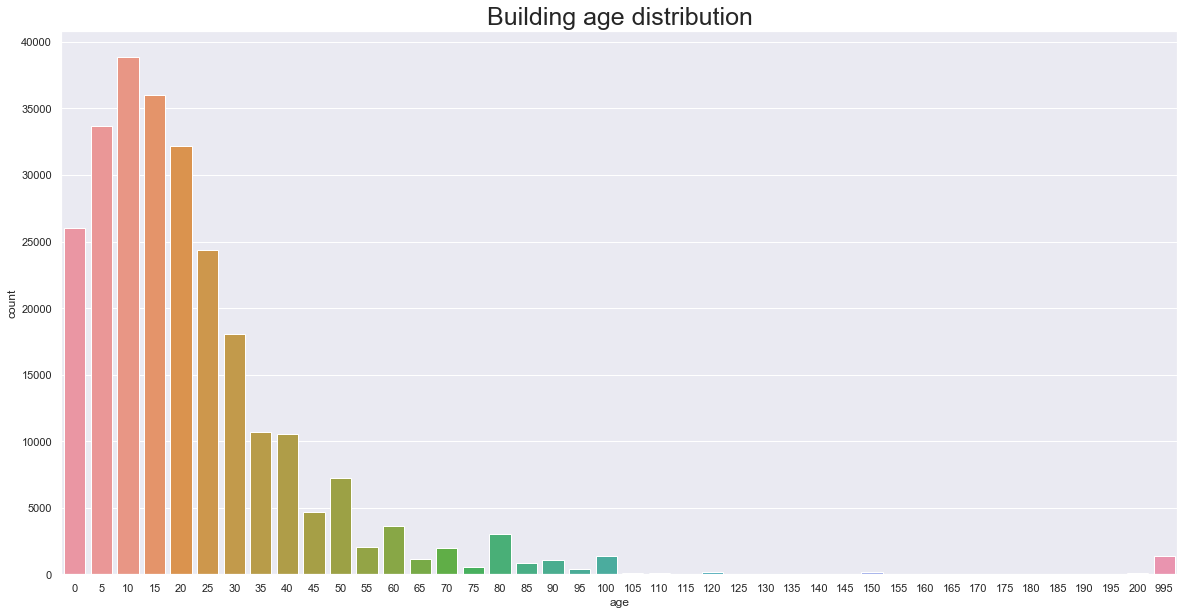

In [483]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(raw_train_features.age)
plt.title('Building age distribution', fontsize=25)
plt.show()

In [369]:
num_buildings = len(raw_train_features[raw_train_features.age > 100])
print('Number of buildings with more than 100 years:', num_rows, ', which represent ', weight_buildings, ' of the samples')
weight_buildings = len(raw_train_features[raw_train_features.age > 100]*100)/len(raw_train_features)

Number of buildings with more than 100 years: 2124 , which represent  0.008150390827356763  of the samples


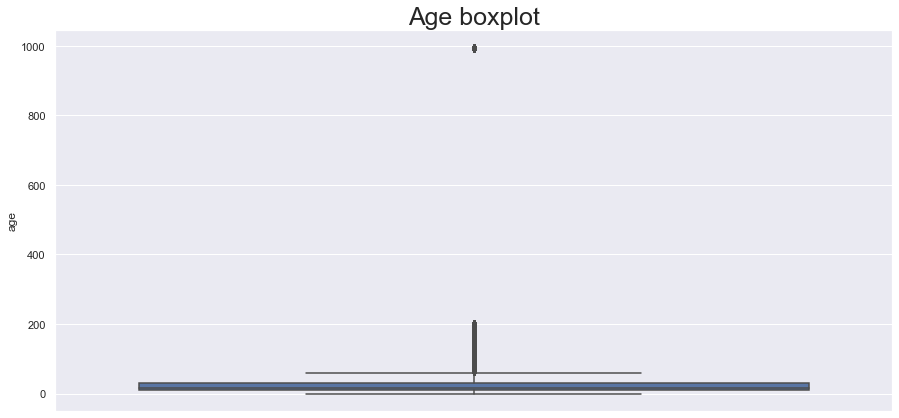

In [370]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.age)
plt.title('Age boxplot', fontsize=25)
plt.show()

In [371]:
raw_train_features.age.describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

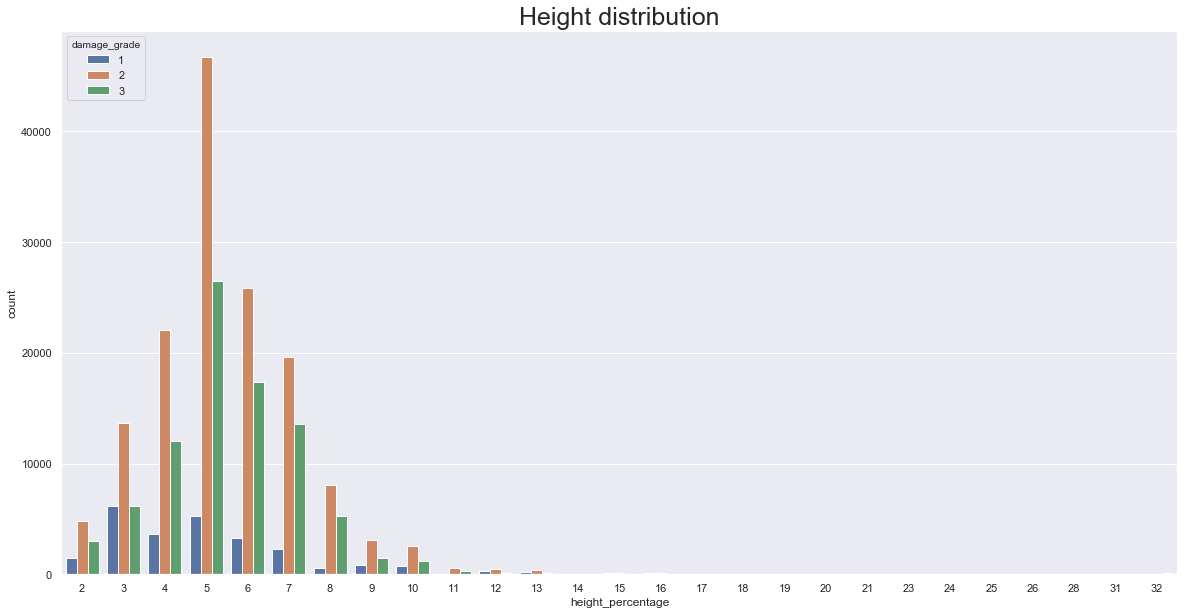

In [372]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.height_percentage, hue = raw_train_labels.damage_grade)
plt.title('Height distribution', fontsize=25)
plt.show()


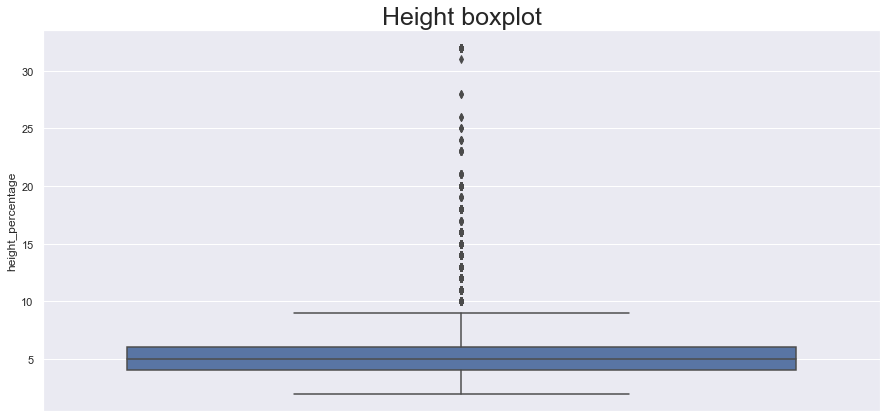

In [373]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.height_percentage)
plt.title('Height boxplot', fontsize=25)
plt.show()

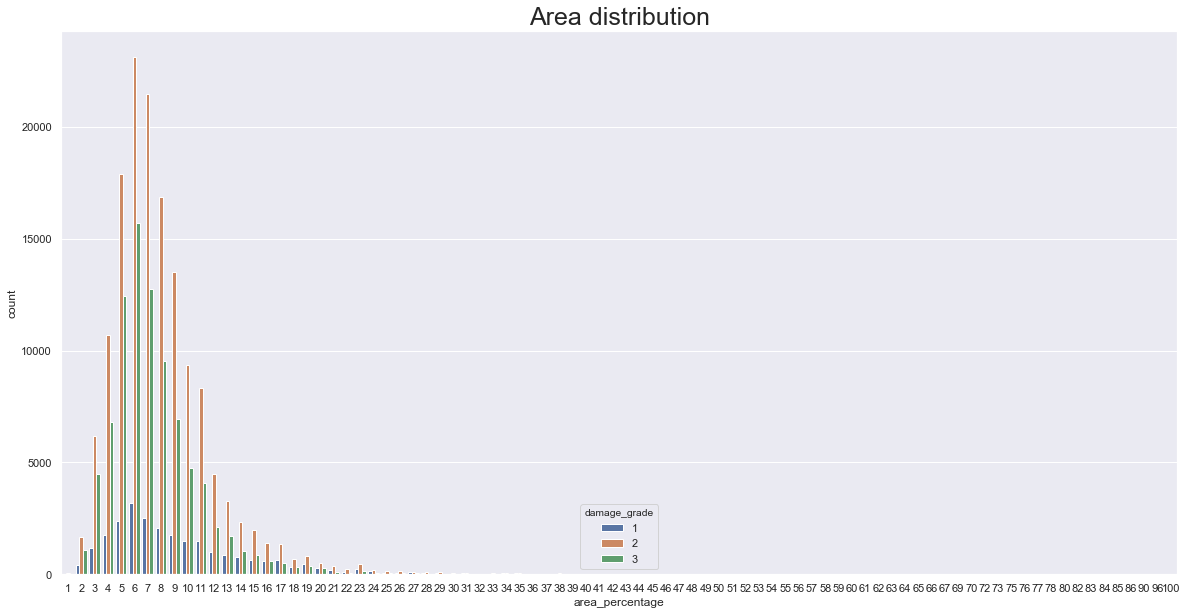

In [374]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.area_percentage, hue = raw_train_labels.damage_grade)
plt.title('Area distribution', fontsize=25)
plt.show()

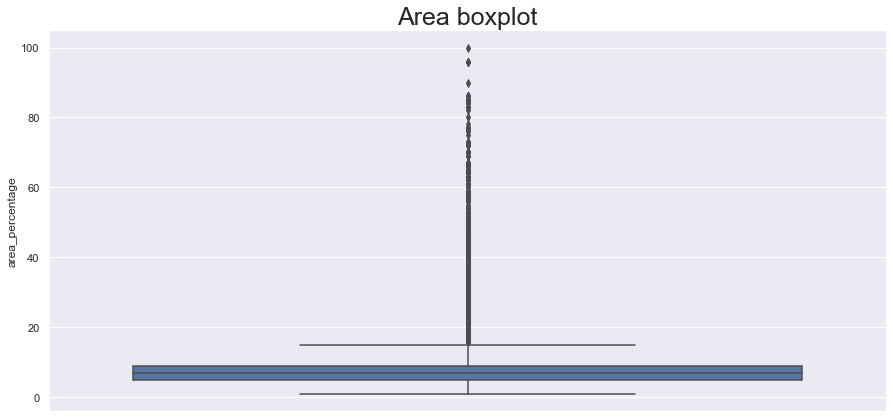

In [375]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.area_percentage)
plt.title('Area boxplot', fontsize=25)
plt.show()

In [513]:
corr = raw_train_features.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,1,-0.0028,0.00035,-0.00039,-0.00065,-0.0015,-0.0021,9.6e-05,-0.00031,0.0024,0.0014,-0.00083,-0.0038,0.0019,0.002,0.0013,0.0025,-0.0023,0.0022,-0.0006,0.0026,0.0026,0.0019,-0.0022,0.00071,-0.00036,0.0023,-0.00037,0.00054,-0.0031,-0.0023
geo_level_1_id,-0.0028,1,-0.061,0.0027,-0.089,-0.0039,0.071,-0.063,-0.018,-0.15,0.0077,0.024,-0.029,0.13,0.14,0.074,0.016,0.016,0.023,0.035,-0.01,-0.02,0.0019,0.024,0.0037,0.003,0.0027,-0.0023,0.0011,0.00052,-0.018
geo_level_2_id,0.00035,-0.061,1,0.00092,0.048,0.013,-0.049,0.036,0.016,0.076,-0.0087,-0.0091,0.014,-0.08,-0.024,-0.033,-0.038,-0.036,-0.02,-0.012,-0.0015,0.018,-0.0084,-0.031,-0.0048,-0.0049,0.00069,-0.00076,-0.00015,0.0019,-0.013
geo_level_3_id,-0.00039,0.0027,0.00092,1,-0.022,-0.0064,-0.0056,-0.025,-0.016,0.026,0.02,0.006,-0.023,-0.0051,-0.0039,0.0061,0.0023,-0.012,-0.011,-0.0025,0.0074,0.016,-0.002,-0.0074,-0.0071,-0.0044,-0.00086,-0.0026,-0.00094,0.00027,-0.0025
count_floors_pre_eq,-0.00065,-0.089,0.048,-0.022,1,0.087,0.1,0.77,0.17,-0.027,-0.041,-0.011,0.26,-0.086,-0.057,-0.07,0.0074,0.049,-0.03,0.087,0.052,-0.0053,0.077,0.035,0.016,0.0088,-0.0026,0.0068,0.0096,0.0039,-0.0021
age,-0.0015,-0.0039,0.013,-0.0064,0.087,1,-0.0043,0.061,0.068,0.0013,0.0091,-0.012,0.08,-0.037,0.0059,-0.0084,-0.025,-0.026,-0.0015,0.0053,-0.0088,-0.0022,-0.01,0.0012,-0.0042,-0.0035,-0.0037,-0.0022,-0.0018,-0.0012,-0.0045
area_percentage,-0.0021,0.071,-0.049,-0.0056,0.1,-0.0043,1,0.2,0.026,-0.23,-0.00047,0.074,0.053,0.21,-0.054,-0.032,0.19,0.22,0.0079,0.089,0.12,-0.016,0.16,0.11,0.052,0.05,0.019,0.015,0.015,0.005,0.013
height_percentage,9.6e-05,-0.063,0.036,-0.025,0.77,0.061,0.2,1,0.15,-0.11,-0.02,0.013,0.21,0.0017,-0.052,-0.063,0.086,0.13,-0.019,0.064,0.092,-0.0054,0.12,0.069,0.031,0.02,0.0019,0.011,0.015,0.004,0.0054
has_superstructure_adobe_mud,-0.00031,-0.018,0.016,-0.016,0.17,0.068,0.026,0.15,1,-0.31,0.007,-0.015,0.31,-0.038,0.012,0.012,-0.037,-0.037,0.058,0.033,-0.013,-0.0039,-0.013,-0.0039,-0.0043,-0.0024,0.0018,-0.0033,-0.0026,-0.0015,-0.01
has_superstructure_mud_mortar_stone,0.0024,-0.15,0.076,0.026,-0.027,0.0013,-0.23,-0.11,-0.31,1,-0.034,-0.1,-0.38,-0.47,-0.04,-0.055,-0.22,-0.22,-0.042,0.0016,-0.088,0.058,-0.16,-0.12,-0.036,-0.023,-0.026,-0.0088,-0.012,-0.0034,0.0056


KeyboardInterrupt: 

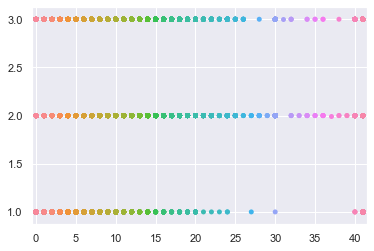

# Feature engineering

### Dealing with categorical variables

In [484]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

extended_train_features

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,...,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,1,0


### Age

In [485]:
# Drop buildings with more that 100 years from train features and labels

building_index = extended_train_features[extended_train_features.age > 100].index
extended_train_labels = raw_train_labels.copy()
extended_train_labels.drop(building_index, inplace=True)
extended_train_features.drop(building_index, inplace=True)
print(len(extended_train_labels))
print(len(extended_train_features))

258477
258477


In [462]:
# Normalizing age data

from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
train_age_scaled = scaler1.fit_transform(np.array(extended_train_features.iloc[:, 5]).reshape(-1,1))

print(train_age_scaled.mean(axis=0))
print(train_age_scaled.std(axis=0))

extended_train_features.age = train_age_scaled


[0.02666837]
[0.07393547]


### Height

In [486]:
# Normalize heigth data

scaler2 = MinMaxScaler()
train_hieght_scaled = scaler2.fit_transform(np.array(extended_train_features.iloc[:, 7]).reshape(-1,1))

extended_train_features.height_percentage = train_hieght_scaled

extended_train_features

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,0.100000,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,0.233333,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,0.033333,0,1,...,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,0.133333,0,0,...,0,0,0,0,0,0,0,0,1,0


### Area

In [487]:
# Normalize area data

scaler3 = MinMaxScaler()
train_area_scaled = scaler3.fit_transform(np.array(extended_train_features.iloc[:, 6]).reshape(-1,1))

extended_train_features.area_percentage = train_hieght_scaled


### Geolocation  features


In [494]:
scaler4 = MinMaxScaler()
train_geo1_scaled = scaler4.fit_transform(np.array(extended_train_features.iloc[:, 1]).reshape(-1,1))
extended_train_features.geo_level_1_id = train_geo1_scaled

scaler5 = MinMaxScaler()
train_geo2_scaled = scaler5.fit_transform(np.array(extended_train_features.iloc[:, 2]).reshape(-1,1))
extended_train_features.geo_level_2_id = train_geo2_scaled


# Preparing the data for the ML models 

### Features and labels

In [495]:
labels = extended_train_labels['damage_grade']
labels = np.array(labels)
print(labels.shape)

# Remove building id
exclude = ['building_id']
 
features_pandas = extended_train_features.loc[:,[i for i in list(extended_train_features.columns) if i not in exclude]]
features = np.array(features_pandas)
print(features_pandas.shape)

(258477,)
(258477, 68)


### Split data

In [496]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print('Shape of data')
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")


Shape of data
(180933, 68)
(180933,)
(77544, 68)
(77544,)



### Distribution of train labels

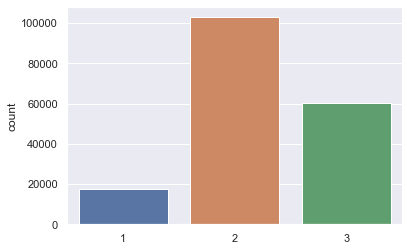

In [389]:
sns.set(style="darkgrid")
ax = sns.countplot(train_labels)

### Classes weights 

In [391]:
total_count = (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
actual_weight_1 = sum(train_labels == 1) * 100 / total_count
actual_weight_2 = sum(train_labels == 2) * 100 / total_count
actual_weight_3 = sum(train_labels == 3) * 100 / total_count
print('Class 1: ', actual_weight_1)
print('Class 2: ',actual_weight_2)
print('Class 3: ',actual_weight_3)

Class 1:  9.657718603018797
Class 2:  56.89011954701464
Class 3:  33.452161849966565


# Models

In [392]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#### Helpers

In [393]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### Logistic Regression

In [456]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1).fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished


In [457]:
logistic_prediction = logistic_model.predict(test_features)

0.5746414938615496

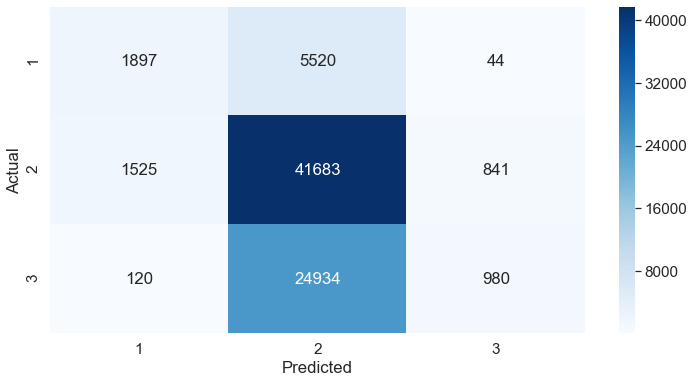

In [458]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
f1_score(test_labels, logistic_prediction, average = 'micro')

### Random Forest

In [497]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [498]:
random_prediction1 = random_forest1.predict(test_features)

0.7027880945011864

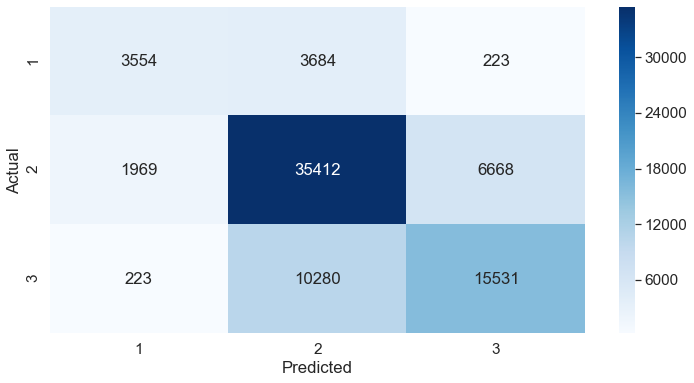

In [499]:
random_cm1 = confusionMatrix(test_labels, random_prediction1)
f1_score(test_labels, random_prediction1, average = 'micro')

### Neuronal Networks

In [505]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical



ModuleNotFoundError: No module named 'keras'

In [ ]:
# One hot encode train and test labels

label_encoder = LabelEncoder()
enc_train_labels = label_encoder.fit_transform(train_labels)
onehot_train_labels = to_categorical(enc_train_labels, num_classes=3)

label_encoder = LabelEncoder()
enc_test_labels = label_encoder.fit_transform(test_labels)
onehot_test_labels = to_categorical(enc_test_labels, num_classes=3)




In [500]:
### Define the model

NB_EPOCHS = 1000
BATCH_SIZE = 16

nn_model = Sequential()

# Input layer
nn_model.add(Dense(512, input_shape = (69,)))

# Hidden layer
nn_model.add(Dense(218))

# Hidden layer
nn_model.add(Dense(64))

# Output layer
nn_model.add(Dense(3, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

nn_model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# Train the model

history = nn_model.fit(train_features,
                       onehot_train_labels,
                       validation_data = (test_features, onehot_test_labels),
                       nb_epoch = NB_EPOCHS,
                       batch_size = BATCH_SIZE,
                       callbacks = callbacks_list,
                       verbose = 0)

### SVM

In [ ]:
svm_model = SVC(kernel = 'linear', class_weight={1:0.23, 2:0, 3:0.001},random_state=5).fit(train_features, train_labels)


In [ ]:
svm_prediction = svm_model.predict(test_features)

In [ ]:

svm_cm = confusionMatrix(test_labels, svm_prediction)
svm_accuracy = accuracy_score(test_labels, svm_prediction)
print(accuracy)